# Credit Card issuance 

## Introduction
The present generation is highly motivated towards the use of credit cards. There are a large number of applications for the credit card and it becomes very tedious for the bank to decide which person should be approved a credit card and which not. The list of defaulters is increasing and this brings trouble for the bank and other customers too. The bank needs ways to minimise this number for the proper functioning of the credit card feature and expand to a wider audience. It is where the role of Machine Learning and Data Science comes into play. The tedious task can be dealt with Machine Learning by training the models with minimized errors.

## Problem Description
The bank has provided the data of customers with certain attributes. You need to predict if the customer would be approved a credit card or not. If the credit card is approved, it is denoted with ‘+’ and if it is not approved then it is denoted with '-'.

## Data Description
The data set consists of 17 attributes with their values assigned to meaningless data
to maintain the confidentiality of the data. The data set may have the missing
values.
Data
![image](Untitled1.jpg )

## ML Problem type
This is a **Binary Classification problem** in *Supervised Learning* where we have to predict if a consumer should be approved a credit card or not.

#### Following are the steps followed to build this model-

### 1. Import Libraries
* scikit-learn - for classification algorithms
* numpy- array processing
* pandas - data structures and data manipulation

In [114]:
import pandas as pd
from pandas import read_csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.utils import shuffle
import collections

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

### 2. Gathering the data
Fortunately, the data available is clean and requires minimal manipulation.

In [115]:
df=read_csv('train.csv')
test_df = read_csv('test.csv')

In [116]:
data = pd.DataFrame()
test_data = pd.DataFrame()

### 3. Feature Engineering
Following are the goals of this step-
1. Prepare the proper input dataset by considering the features that influence the result.
2. Improve the performance of the model.


In [117]:
df.head()

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,?,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160,0,-
1,2,?,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372,122,-
2,3,?,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260,1004,-
3,4,?,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300,0,-
4,5,?,26.5,2.710,y,p,?,?,0.085,f,f,0,f,s,80,0,-


In [118]:
dm = pd.DataFrame(df["Income"])
dc = pd.DataFrame(df["CreditScore"])
t_dm= pd.DataFrame(test_df["Income"])
t_dc = pd.DataFrame(test_df["CreditScore"])

In [119]:
data = data.append(dm)
test_data = test_data.append(t_dm)

In [120]:
data.head()

,Income
0,0
1,122
2,1004
3,0
4,0


In [121]:
data = data.join(dc)
test_data = test_data.join(t_dc)

In [122]:
data.head()

,Income,CreditScore
0,0,0
1,122,0
2,1004,0
3,0,0
4,0,0


In [123]:
one_hot = pd.get_dummies(df['PriorDefault'])
tone_hot = pd.get_dummies(test_df['PriorDefault'])

In [124]:
data = data.join(one_hot)
test_data = test_data.join(tone_hot)

In [125]:
df.Employed.unique()

array(['f', 't'], dtype=object)

#### Data processing 
This step involves getting the data in the right format so as to train our models.

In [126]:
df["Employed"] = df["Employed"].replace("f","f_e")
df["Employed"] = df["Employed"].replace("t","t_e")

test_df["Employed"] = test_df["Employed"].replace("f","f_e")
test_df["Employed"] = test_df["Employed"].replace("t","t_e")

Method used for converting categorical data to numerical data- **One hot encoding** It is a representation of categorical variables as binary vectors.

In [127]:
one_hot = pd.get_dummies(df['Employed'])
tone_hot = pd.get_dummies(test_df['Employed'])

In [128]:
data = data.join(one_hot)
test_data = test_data.join(tone_hot)

In [129]:
dd = pd.DataFrame(df["Debt"])
t_dd= pd.DataFrame(test_df["Debt"])

In [130]:
data = data.join(dd)
test_data = test_data.join(t_dd)

In [131]:
data.head()

,Income,CreditScore,f,t,f_e,t_e,Debt
0,0,0,1,0,1,0,3.500
1,122,0,1,0,1,0,1.500
2,1004,0,1,0,1,0,0.585
3,0,0,1,0,1,0,0.665
4,0,0,1,0,1,0,2.710


#### Data visualization
 **Pair plots** help to quickly explore distributions and relationships in a dataset.

In [132]:
sns.pairplot(df.drop("Key",axis=1), hue="Approved", size=3, diag_kind="kde")

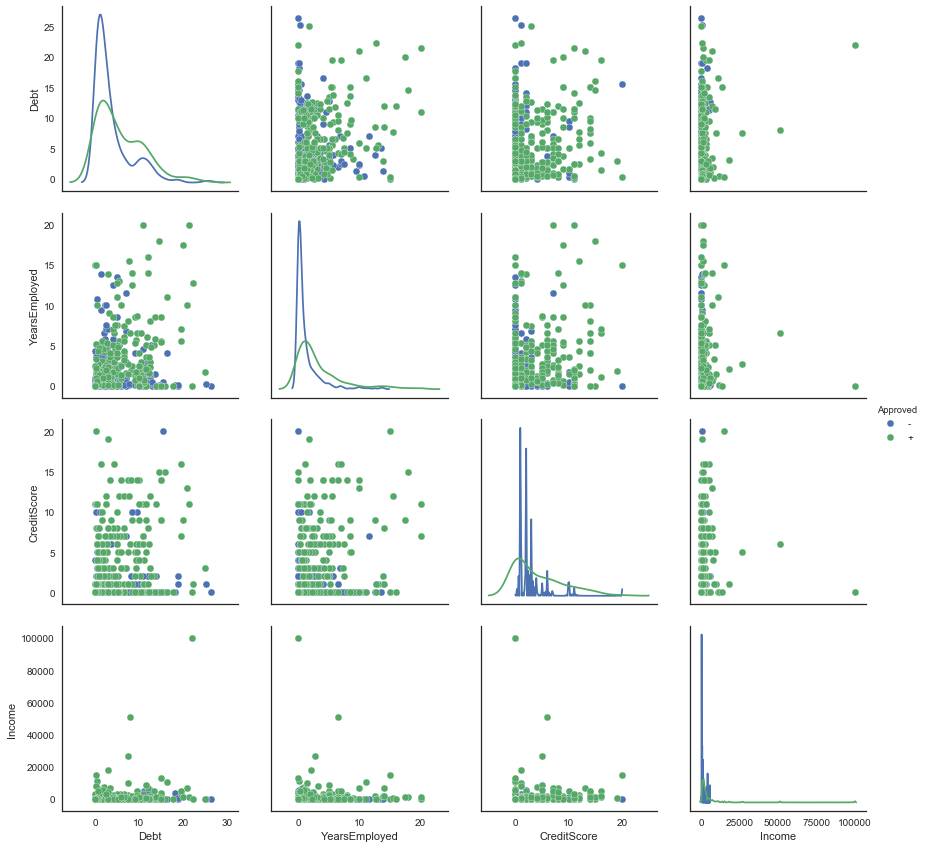

In [133]:
plt.show()

In [134]:
df.Ethnicity.unique()


array(['bb', 'v', '?', 'j', 'ff', 'o', 'h', 'dd', 'z', 'n'], dtype=object)

In [135]:
d_y = df["Approved"]


In [136]:
d_x = data.values
td_x = test_data.values

The input attributes considered are -
1. Income
2. CreditScore
3. Employed
4. Debt

### 4. Building a model
We shall follow the following steps to build a model-
1. Prepare training and testing datasets.
2. Choose a model.
3. Training.
4. Evaluation.
5. Hyperparameter tuning
6. Prediction

#### Preparing train and test datasets
Let us start by spliting the data into traing and testing datasets.

In [137]:
X_train, X_test, Y_train, Y_test = train_test_split(d_x,d_y, test_size=0.10,random_state=7)

#### Choosing the model
The following models have been tested for our training datasets-
1. Naive Bayes Classifier
2. Logistic regression
3. Support Vector Machine
4. Decision Tree classifier
5. Artificial Neural Network  
*Ensembles-*
6. Random Forest classifier
7. AdaBoost Classifier

In [138]:
model = GaussianNB()

In [139]:
model.fit(d_x,d_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [140]:
y_pred = model.predict(td_x)
y_comp = model.predict(X_test)

#### Evaluation Metric used - f1 score
F1 Score is the weighted average of Precision and Recall. Therefore, this score uses both false positives and false negatives.
* **F1 Score = 2*(Recall * Precision) / (Recall + Precision)**
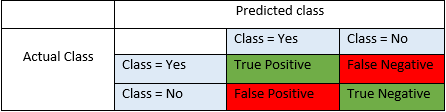
* Precision = TP/TP+FP
* Recall = TP/TP+FN

In [141]:
f1_score(y_comp,Y_test,pos_label="+")

0.8518518518518519

In [142]:
y_pred

array(['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '+', '-',
       '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '+',
       '+', '-', '+', '-', '-', '+', '-', '-', '-', '-', '-', '-', '-',
       '+', '+', '+', '+', '-', '+', '+', '-', '+', '+', '+', '+', '+',
       '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+',
       '+', '+', '+', '+', '+', '+', '+', '+', '-', '-', '-', '-', '+',
       '-', '-', '-', '-', '-', '-', '+', '+', '+', '+', '+', '+', '+',
       '+', '+', '+', '+', '+', '+', '+', '+', '+'], dtype='<U1')

In [143]:
collections.Counter(y_pred)

Counter({'+': 54, '-': 46})

In [144]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, Y_train)

In [145]:
y_comp = LR.predict(X_test)
f1_score(y_comp,Y_test,pos_label="+")

0.8524590163934426

In [146]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
y_comp = model.predict(X_test)
f1_score(y_comp,Y_test,pos_label="+")

0.7586206896551724

In [147]:
SVM = svm.LinearSVC()
SVM.fit(X_train, Y_train)
y_comp = SVM.predict(X_test)
f1_score(y_comp,Y_test,pos_label="+")

0.8

In [148]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(X_train, Y_train)
y_comp = NN.predict(X_test)
f1_score(y_comp,Y_test,pos_label="+")

0.5

In [149]:
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X_train, Y_train)
y_comp = RF.predict(X_test)
f1_score(y_comp,Y_test,pos_label="+")

0.8727272727272728

#### Using hyperparameter tuning for improving the model
Hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is set before the learning process begins. Method used for tuning in this work is - **Grid Search**
 It works by searching exhaustively through a specified subset of hyperparameters.

In [86]:
model=DecisionTreeClassifier()
#prams={'min_samples_leaf':(1,2,3,5),'max_depth':[None,1,2,3]}
params={'criterion':['gini','entropy'],'max_depth':[None,1,2],'max_features':['auto','log2','sqrt',None]}
grid=GridSearchCV(model,params)
grid.fit(d_x,d_y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2],
                    

In [87]:
y_pred = grid.predict(td_x)
y_comp = grid.predict(X_test)
f1_score(y_comp,Y_test,pos_label="+")


0.8787878787878789

In [88]:
collections.Counter(y_pred)

Counter({'+': 70, '-': 30})

#### Using ensembles to check if performance improves
By combining individual models, the ensemble model tends to be more flexible(less bias) and less data-sensitive(less variance). Methods used here are-
* Bagging - **Random Forest**
* Boosting - **AdaBoost **
![image](Untitled3.jpg )


In [89]:
model=RandomForestClassifier()
params={'n_estimators':[10,50,100],'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2'],'max_depth':[1,2,3,5],'min_samples_leaf':[1,2,3]}
grid=GridSearchCV(model,params)
grid.fit(d_x,d_y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [90]:
y_pred = grid.predict(td_x)
y_comp = grid.predict(X_test)
f1_score(y_comp,Y_test,pos_label="+")

0.9180327868852459

In [91]:
collections.Counter(y_pred)

Counter({'+': 60, '-': 40})

In [92]:
model=AdaBoostClassifier()
#prams={'n_estimators':[50,10,100],'learning_rate':[1,2]}
params={'n_estimators':[50,100,150],'learning_rate':[1,2,3],'random_state':[1,2,3]}
grid=GridSearchCV(model,params)
grid.fit(d_x,d_y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [1, 2, 3],
                         'n_estimators': [50, 100, 150],
                         'random_state': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [93]:
grid1 = GridSearchCV(model,params)
grid1.fit(X_train,Y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [1, 2, 3],
                         'n_estimators': [50, 100, 150],
                         'random_state': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [94]:
y_comp1 = grid1.predict(X_test)
f1_score(y_comp1,Y_test,pos_label="+")

0.8275862068965518

In [95]:
y_pred = grid.predict(td_x)
y_comp = grid.predict(X_test)
f1_score(y_comp,Y_test,pos_label="+")

0.9354838709677419

In [96]:
collections.Counter(y_pred)

Counter({'+': 55, '-': 45})

And the winner...

In [153]:
print(grid)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [1, 2, 3],
                         'n_estimators': [50, 100, 150],
                         'random_state': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
{'learning_rate': 1, 'n_estimators': 50, 'random_state': 1}


## Conclusion
The dataset was studied for most influential features. This newly created dataset was trained across various models. It was found that ensembles were giving a marginally better performance. Hyperparameter optimization was performed to get the most effective model. 
(Score - **93**). 
![image](Untitled.jpg )

In [343]:
sub = pd.DataFrame(test_df["Key"])
sub["Approved"] = y_pred
sub.to_csv("submission.csv")

In [298]:
sub.head()

,Key,Approved
0,1,-
1,2,-
2,3,-
3,4,-
4,5,-
